# Training Phase
This file .ypynb is the proof that I really worked on this Homework.
I did training of the model on Colab, and also the predict because in local it was
very slowly. But I implemented also the predict.py, so you can test it using that.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip 'drive/My Drive/training_on_colab.zip'

Archive:  drive/My Drive/training_on_colab.zip
   creating: training_on_colab/
  inflating: training_on_colab/babelnet2lexnames.tsv  
  inflating: training_on_colab/babelnet2wndomains.tsv  
  inflating: training_on_colab/babelnet2wordnet.tsv  
   creating: training_on_colab/train/
  inflating: training_on_colab/train/eurosense.dom.labels.txt  
  inflating: training_on_colab/train/eurosense.lex.labels.txt  
  inflating: training_on_colab/train/eurosense.resize.bn.labels.txt  
  inflating: training_on_colab/train/eurosense.resize.input.txt  
  inflating: training_on_colab/train/semcor.bn.labels.txt  
  inflating: training_on_colab/train/semcor.dom.labels.txt  
  inflating: training_on_colab/train/semcor.input.txt  
  inflating: training_on_colab/train/semcor.lex.labels.txt  
  inflating: training_on_colab/train/tom.dom.labels.txt  
  inflating: training_on_colab/train/tom.lex.labels.txt  
  inflating: training_on_colab/train/tom.resize.bn.labels.txt  
  inflating: training_on_colab/train

In [0]:
!pip install tensorflow-gpu==1.12.0
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1

     |████████████████████████████████| 281.7MB 90kB/s 
     |████████████████████████████████| 3.1MB 42.5MB/s 
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.12.2 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
--2019-09-11 07:17:35--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.182.215
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.182.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?o3r72h3NCfqnywxdPyiVFstuQH7KZY10uyPp5iC7_m8-3HuIUl4r1GdaljdIszNCCdvVm6e9zrgz70VpXcpIq353ntj9Fa3WaJmvoDAcndovyW6paa_0dT

In [0]:
import model as md
import preprocessing as pre
import numpy as np
from tqdm import tqdm
import parsing as par
import global_paths as gp
import tensorflow as tf

import preprocessing as pre
print(tf.__version__)

1.12.0


In [0]:
#USE TO SOLVE GPU OOM PROBLEM
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.Session(config = config)

In [0]:
#READ THE TRAIN, DEV DATA AND TEST DATA
colab_folder = "training_on_colab/"
train_dir = "train/"
dev_dir = "dev/"
test_dir = "test/"
train_x_sem = []
train_x_tom = []


#LOAD SEMCOR
train_x_sem = pre.load_data_from_file(colab_folder+train_dir+"semcor.input.txt")
label_bn_y_sem = pre.load_data_from_file(colab_folder+train_dir+"semcor.bn.labels.txt")
label_dom_y_sem = pre.load_data_from_file(colab_folder+train_dir+"semcor.dom.labels.txt")
label_lex_y_sem = pre.load_data_from_file(colab_folder+train_dir+"semcor.lex.labels.txt")


'''
#LOAD TOM
train_x_tom = pre.load_data_from_file(colab_folder+train_dir+"tom.resize.input.txt")
label_bn_y_tom = pre.load_data_from_file(colab_folder+train_dir+"tom.resize.bn.labels.txt")
label_dom_y_tom = pre.load_data_from_file(colab_folder+train_dir+"tom.dom.labels.txt")
label_lex_y_tom = pre.load_data_from_file(colab_folder+train_dir+"tom.lex.labels.txt")
'''

#CONCATENATE DATASETS
number_tom = 80000

'''
train_x = train_x_euro[:number_eurosense] #train_x_sem #+ + train_x_tom
label_bn_y = label_bn_y_euro[:number_eurosense]#label_bn_y_sem #+  #+ label_bn_y_tom
label_dom_y = label_dom_y_euro[:number_eurosense]#label_dom_y_sem #+  #+ label_dom_y_tom
label_lex_y = label_lex_y_euro[:number_eurosense]#label_lex_y_sem #+  #+ label_lex_y_tom
'''

train_x = train_x_sem
label_bn_y = label_bn_y_sem
label_dom_y =  label_dom_y_sem
label_lex_y = label_lex_y_sem


#LOAD SEMEVAL2007 (DEV)
dev_train_x = pre.load_data_from_file(colab_folder+dev_dir+"semeval2007.input.txt")
dev_label_bn_y = pre.load_data_from_file(colab_folder+dev_dir+"semeval2007.bn.labels.txt")
dev_label_dom_y = pre.load_data_from_file(colab_folder+dev_dir+"semeval2007.dom.labels.txt")
dev_label_lex_y = pre.load_data_from_file(colab_folder+dev_dir+"semeval2007.lex.labels.txt")

#IMPORT FILE TO BUILD VOCABS AND BABELNET TO WORDNET MAPPING
b2w_map_path = colab_folder+"babelnet2wordnet.tsv"
b2dom_map_path = colab_folder+"babelnet2wndomains.tsv"
b2lex_map_path = colab_folder+"babelnet2lexnames.tsv"

#CREATE W2B MAP
b2w, w2b = par.create_maps_from_tsv(b2w_map_path)
b2dom, dom2b = par.create_maps_from_tsv(b2dom_map_path)
b2lex, lex2b = par.create_maps_from_tsv(b2lex_map_path)

37176it [00:00, 220469.43it/s]
37176it [00:00, 124321.65it/s]
37176it [00:00, 210837.27it/s]
37176it [00:00, 104076.73it/s]
135it [00:00, 110873.51it/s]
135it [00:00, 88806.62it/s]
135it [00:00, 86328.87it/s]
135it [00:00, 105916.77it/s]
117659it [00:00, 742050.35it/s]
92601it [00:00, 781419.49it/s]
117653it [00:00, 836250.83it/s]


In [0]:
def calculate_length_sentences(data):
  freq = {}
  for sentence in data:
    if len(sentence) not in freq:
      freq[len(sentence)] = 1
    else:
      freq[len(sentence)]+=1
  return freq



In [0]:

'''
At the end, i didn't use it
'''
#CLEAN THE DATA
train_x = pre.clean_data(train_x)
label_bn_y = pre.clean_data(label_bn_y)
label_dom_y = pre.clean_data(label_dom_y)
label_lex_y = pre.clean_data(label_lex_y)

dev_train_x = pre.clean_data(dev_train_x)
dev_label_bn_y = pre.clean_data(dev_label_bn_y)
dev_label_dom_y = pre.clean_data(dev_label_dom_y)
dev_label_lex_y = pre.clean_data(dev_label_lex_y)





In [0]:
#USED ONLY FOR ELMO EMBEDDINGS
sentence_train_x = pre.make_sentences(train_x)
sentence_dev_train_x = pre.make_sentences(dev_train_x)


In [0]:
#DEFINE VOCABS
number_of_appearance_input = 5
number_of_appearance_sense_bn = 5
vocab_input_data = pre.create_input_vocab(train_x,number_of_appearance_input)
vocab_bn_labels = pre.create_sense_bn_vocab(label_bn_y,number_of_appearance_sense_bn)
vocab_dom_labels = pre.create_sense_inventory(b2dom)
vocab_lex_labels = pre.create_sense_inventory(b2lex)

output_bn_vocab, reverse_output_bn_vocab = pre.make_output_bn_vocab(vocab_input_data, vocab_bn_labels)
output_dom_vocab, reverse_output_dom_vocab = pre.make_output_sense_vocab(vocab_dom_labels)
output_lex_vocab, reverse_output_lex_vocab = pre.make_output_sense_vocab(vocab_lex_labels)

In [0]:
#TOKENIZE TRAIN X IF NOT USED ELMO
train_x = pre.tokenize_data(train_x,output_bn_vocab,mode='train')
dev_train_x = pre.tokenize_data(dev_train_x,output_bn_vocab,mode='train')

In [0]:
#TOKENIZE DATA

label_bn_y = pre.tokenize_data(label_bn_y,output_bn_vocab,mode='train')
label_dom_y = pre.tokenize_data(label_dom_y,output_dom_vocab,mode='train')
label_lex_y = pre.tokenize_data(label_lex_y,output_lex_vocab,mode='train')


dev_label_bn_y = pre.tokenize_data(dev_label_bn_y,output_bn_vocab,mode='train')
dev_label_dom_y = pre.tokenize_data(dev_label_dom_y,output_dom_vocab,mode='train')
dev_label_lex_y = pre.tokenize_data(dev_label_lex_y,output_lex_vocab,mode='train')

In [0]:
#DEFINE THE MODEL PARAMETERS

'''
Embedding size:  200 
Hidden size:  256 
Input Dropout:  0.4 
LSTM Dropout:  0.15 
Learning rate:  0.015
'''
EMBEDDING_SIZE = 300
HIDDEN_SIZE = 256
INPUT_DROPOUT = 0.4
LSTM_DROPOUT = 0.4
LEARNING_RATE = 0.0015
OPTIMIZER = "adam"
BATCH_SIZE = 64
EPOCHS = 6
STEPS_PER_EPOCH = (len(train_x) // BATCH_SIZE) 
VALIDATION_STEPS = (len(dev_train_x) // (BATCH_SIZE//8))
INITIAL_EPOCH = 0

In [0]:
#DEFINE VARIABLE OF THE MODEL
PREDICT_2BLSTM = False
PREDICT_ELMO = True
PREDICT_ATTENTION = True

In [0]:
#CREATE MODEL
if PREDICT_2BLSTM:
  model = md.create_2_BLSTM_layers(len(vocab_input_data),len(output_bn_vocab),
                                 len(output_dom_vocab),
                                  len(output_lex_vocab),
                                       EMBEDDING_SIZE,
                                       HIDDEN_SIZE,
                                       INPUT_DROPOUT,
                                       LSTM_DROPOUT)
else:
  model = md.create_BLSTM(len(vocab_input_data),len(output_bn_vocab),
                                 len(output_dom_vocab),
                                  len(output_lex_vocab),
                                       EMBEDDING_SIZE,
                                       HIDDEN_SIZE,
                                       INPUT_DROPOUT,
                                       LSTM_DROPOUT,elmo=PREDICT_ELMO,attention=PREDICT_ATTENTION)


Creating 2 BLSTM multitask


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 300)    3402600     input_1[0][0]                    
__________________________________________________________________________________________________
Dropout (Dropout)               (None, None, 300)    0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, None, 512)    1140736     Dropout[0][0]                    
__________________________________________________________________________________________________
bidirectio

In [0]:
#compile model
model = md.compile_keras_model(model,OPTIMIZER,LEARNING_RATE)

In [0]:
#TRAIN THE MODEL
if PREDICT_ELMO:
  stats = md.train_keras_model_elmo(model,sentence_train_x,label_bn_y,
                                       label_dom_y, label_lex_y, 
                                       sentence_dev_train_x,dev_label_bn_y,
                                       dev_label_dom_y, dev_label_lex_y,
                                       BATCH_SIZE,
                                       EPOCHS,
                                       STEPS_PER_EPOCH,
                                       VALIDATION_STEPS,"elmo_weights",pad_sequence=True)
else:
  stats = md.train_keras_model_multitask(model,train_x,label_bn_y,
                                       label_dom_y, label_lex_y, 
                                       dev_train_x,dev_label_bn_y,
                                       dev_label_dom_y, dev_label_lex_y,
                                       BATCH_SIZE,
                                       EPOCHS,
                                       STEPS_PER_EPOCH,
                                       VALIDATION_STEPS,INITIAL_EPOCH,"weights",pad_sequence=True)
  




Starting training...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/6
579/580 [============================>.] - ETA: 0s - loss: 6.2921 - bn_output_loss: 4.4608 - dom_output_loss: 0.7693 - lex_output_loss: 1.0620 - bn_output_acc: 0.3801 - dom_output_acc: 0.8240 - lex_output_acc: 0.7387
Epoch 00001: val_bn_output_loss improved from inf to 2.56736, saving model to drive/My Drive/weights.hdf5
580/580 [==============================] - 468s 806ms/step - loss: 6.2869 - bn_output_loss: 4.4581 - dom_output_loss: 0.7682 - lex_output_loss: 1.0606 - bn_output_acc: 0.3805 - dom_output_acc: 0.8243 - lex_output_acc: 0.7391 - val_loss: 3.9072 - val_bn_output_loss: 2.5674 - val_dom_output_loss: 0.5677 - val_lex_output_loss: 0.7722 - val_bn_output_acc: 0.6453 - val_dom_output_acc: 0.8964 - val_lex_output_acc: 0.8620
Epoch 2/6
579/580 [============================>.] - ETA: 0s - loss: 3.8027 - bn_output_loss: 2.5372 - dom_output_loss: 0.5552 - lex_output_loss: 0.7103 - bn_output_acc: 0.6408 - dom_output_acc: 0.8735 - lex_output_acc: 0.8049
Epoch 00002: val_bn_o

In [0]:
#WRITE THE TRAINING BRIEFING FILE
briefing = "briefing.txt"
def write_briefing(model,stats,train_x_sem,train_x_euro,train_x_tom,
                   train_x_concatenate,number_of_appearance_input,
                   number_of_appearance_sense_bn,vocab_input_data,
                   output_bn_vocab,output_dom_vocab,output_lex_vocab,
                   EMBEDDING_SIZE,HIDDEN_SIZE,INPUT_DROPOUT,LSTM_DROPOUT,
                   LEARNING_RATE,OPTIMIZER,BATCH_SIZE,EPOCHS,STEPS_PER_EPOCH
                   ,VALIDATION_STEPS,used_elmo=False,used_attention= False):
  print("BRIEFING\n")
  print("TRAINING STEP:\n")
  print("Datasets used:")
  print("Semcor with ",len(train_x_sem)," sentences") if train_x_sem != [] else None
  print("Eurosense with ",len(train_x_euro)," sentences") if train_x_euro != [] else None
  print("Tom with ",len(train_x_tom)," sentences") if train_x_tom != [] else None
  print("total sentences: ",len(train_x_concatenate),"\n\n")
  print("Vocab used:")
  print("The input vocab has only words that appear "+str(number_of_appearance_input)+" or more times")
  print("The output bn vocab has only sense words that appear "+str(number_of_appearance_sense_bn)+" or more times")
  print(len(vocab_input_data)," words for input vocab")
  print(len(output_bn_vocab)," words for output bn vocab, where" 
        ,len(output_bn_vocab)-len(vocab_input_data)," are sense babelnet")
  print(len(output_dom_vocab)," words for output dom vocab")
  print(len(output_lex_vocab)," words for output lex vocab\n\n")
  print("Model used:")
  print("BLSTM MultiTask with Elmo") if used_elmo else print("BLSTM Multitask Keras Embeddings")
  print("..with Attention Layer") if used_attention else print("...without Attention Layer")
  print("Model parameters:")
  print("Embedding size: ",EMBEDDING_SIZE,"") if not used_elmo else None
  print("Hidden size: ",HIDDEN_SIZE,"")
  print("Input Dropout: ",INPUT_DROPOUT,"")
  print("LSTM Dropout: ",LSTM_DROPOUT,"")
  print("Learning rate: ",LEARNING_RATE,"")
  print("Optimizer: ",OPTIMIZER,"\n\n")
  print("Training parameters: ")
  print("Batch size: ",BATCH_SIZE,"")
  print("Epochs: ",EPOCHS,"")
  print("Steps_per_epochs: ",STEPS_PER_EPOCH,"")
  print("Validation Steps: ",VALIDATION_STEPS,"\n\n")
  print("Model summary: ")
  print(model.summary())
  print("---------------------")
  print("Model performance: ")
  for k,v in stats.history.items():
    print(k," --> from ",v[0]," to ",v[-1])
  
  
  

In [0]:
#Load the weights if colab disconnetted
model.load_weights("drive/My Drive/elmo_weights.hdf5")

In [0]:
write_briefing(model,stats,train_x_sem,train_x_euro,train_x_tom,
                   train_x,number_of_appearance_input,
                   number_of_appearance_sense_bn,vocab_input_data,
                   output_bn_vocab,output_dom_vocab,output_lex_vocab,
                   EMBEDDING_SIZE,HIDDEN_SIZE,INPUT_DROPOUT,LSTM_DROPOUT,
                   LEARNING_RATE,OPTIMIZER,BATCH_SIZE,EPOCHS,STEPS_PER_EPOCH
                   ,VALIDATION_STEPS,used_elmo=False,used_attention=False)

BRIEFING

TRAINING STEP:

Datasets used:
Semcor with  37176  sentences
total sentences:  37176 


Vocab used:
The input vocab has only words that appear 5 or more times
The output bn vocab has only sense words that appear 5 or more times
11342  words for input vocab
19541  words for output bn vocab, where 8199  are sense babelnet
168  words for output dom vocab
47  words for output lex vocab


Model used:
BLSTM Multitask Keras Embeddings
...without Attention Layer
Model parameters:
Embedding size:  300 
Hidden size:  256 
Input Dropout:  0.4 
LSTM Dropout:  0.4 
Learning rate:  0.0015 
Optimizer:  adam 


Training parameters: 
Batch size:  64 
Epochs:  6 
Steps_per_epochs:  580 
Validation Steps:  16 


Model summary: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                   

In [0]:
#METHOD USED TO PLOT THE PERFORMANCE OF THE MODEL

import matplotlib.pyplot as plt
%matplotlib inline
def plot_model_performance(stats,train,val,dir):
  
  par_train = stats.history[train]
  par_val = stats.history[val]
  epochs = range(1, len(par_train) + 1)

  plt.plot(epochs, par_train, 'g', label='Training '+train)
  plt.plot(epochs, par_val, 'b', label='Validation '+train)
  plt.title('Training and validation '+train)
  plt.xlabel('Epochs')
  plt.ylabel(train)
  plt.legend()
  plt.savefig(dir+train+".png")
  plt.show()

mkdir: cannot create directory ‘plots’: File exists


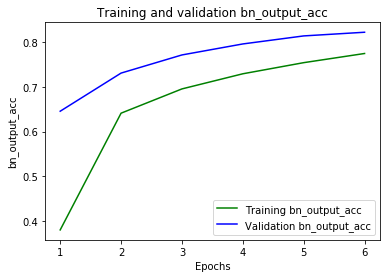

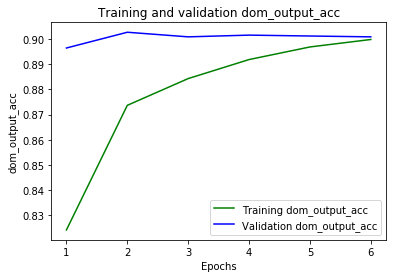

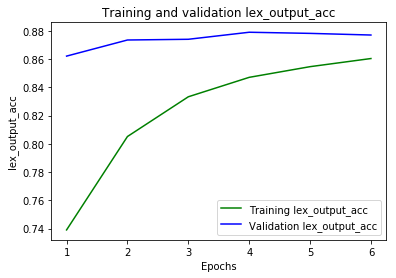

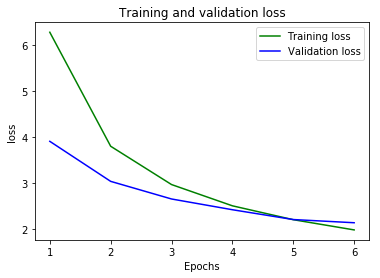

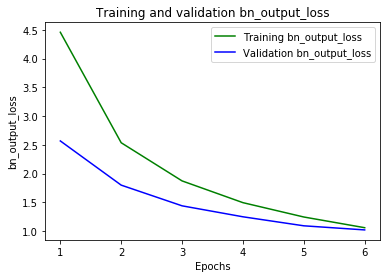

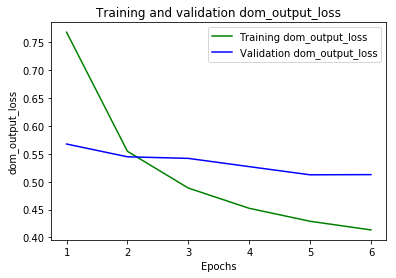

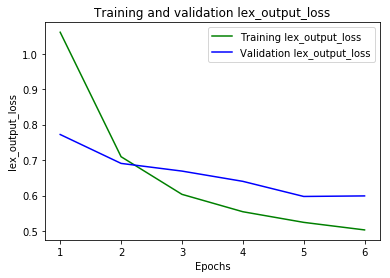

plots/
plots/bn_output_acc.png
plots/bn_output_loss.png
plots/dom_output_acc.png
plots/lex_output_loss.png
plots/dom_output_loss.png
plots/loss.png
plots/lex_output_acc.png


In [0]:
#PLOT THE MODEL PERFORMANCE
plot_dir = "plots/"
!mkdir plots
plot_model_performance(stats,"bn_output_acc","val_bn_output_acc",plot_dir)
plot_model_performance(stats,"dom_output_acc","val_dom_output_acc",plot_dir)
plot_model_performance(stats,"lex_output_acc","val_lex_output_acc",plot_dir)
plot_model_performance(stats,"loss","val_loss",plot_dir)
plot_model_performance(stats,"bn_output_loss","val_bn_output_loss",plot_dir)
plot_model_performance(stats,"dom_output_loss","val_dom_output_loss",plot_dir)
plot_model_performance(stats,"lex_output_loss","val_lex_output_loss",plot_dir)
!tar -zcvf plots.tar.gz plots

# predict phase

In [0]:
!mkdir output
import nltk
nltk.download('wordnet')

mkdir: cannot create directory ‘output’: File exists
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import model as md
import preprocessing as pre
import os
import numpy as np
from tqdm import tqdm
from nltk.corpus import wordnet as wn
import parsing as par
import global_paths as gp
import tensorflow as tf
from tensorflow.python.keras import backend as K, metrics

In [0]:
PREDICT_2BLSTM = False
predict_elmo = True
predict_attention = True

weights_file = "drive/My Drive/weights.hdf5"

In [0]:
'''
Method that return only the corresponding tokens form the output_vocab from the synsets that have the same lemma passed
in input.
:lemma the input word
:output_vocab the dictionary that contains simple words and sense words as keys
and id tokens as values
:sense_vocab the dictionary that contains the babelnet synsets used as filter.
:return a list with the id tokens 
'''
def return_index_of_vocab_bn(lemma, output_vocab, sense_vocab):
  result = []
  for k,v in output_vocab.items():
    #if the key is a sense word and the lemma of this word
    #is equal to my lemma
    if k in sense_vocab and k.split("_bn:")[0] == lemma:
        result.append(v)
  return result

'''
Method used to return all synsets from the output_bn_vocab that have the same lemma passed in input.
:param lemma lemma used to search the corresponding synsets
:param output_bn_vocab dictionary where search the babelnet synsets
:return a list containing only babelnet synsets that corresponding to the lemma
'''
def return_all_synsets_from_lemma(lemma,output_bn_vocab):
    result = []
    for k in output_bn_vocab.keys():
        if "bn:" in k and k.split("_bn:")[0] == lemma:
            result.append("bn:"+k.split("_bn:")[1])
    return result


def return_sense_indices_of_vocab(list_synsets, map_to_convert, output_sense_vocab, mode = 'dom'):
    result = []
    for el in list_synsets:
        if el in map_to_convert:
            sense = map_to_convert[el]
        else:
            if mode == 'dom':
                sense = "factotum"
            elif mode == 'lex':
                return []
        index = output_sense_vocab[sense]
        result.append(index)
    return result


'''
Method that writes the result obtained from the predict on a file.
:param file_to_write the file_path where write the result
:result_map the dictionary containing the id of the instances as keys and
the value predicted as values
'''
def write_result_on_file(file_to_write,result_map):
    with open(file_to_write,'w',encoding='utf-8') as fw:
        for k, v in result_map.items():
            fw.write(k+" "+v+'\n')
    fw.close()


In [0]:
def preprocess_for_predict(input_path, resources_path, mode = 'bn'):
    print("load data and clean it to make vocabs")
    # load the paths used to make the vocabs
    num_eurosense = 40000
    num_tom = 80000
    
    train_x = pre.load_data_from_file(resources_path + gp.semCor_train_input_path)
    label_bn_y = pre.load_data_from_file(resources_path + gp.semCor_train_bn_labels_path)
  

    b2dom, dom2b = par.create_maps_from_tsv(resources_path + gp.b2wn_domains_map_path)
    b2lex, lex2b = par.create_maps_from_tsv(resources_path + gp.b2lexnames_map_path)

    print("create wordnet to babelnet mapping")
    # create the wordnet to babelnet mapping
    b2w_map, w2b_map = par.create_maps_from_tsv(os.path.join(resources_path, "babelnet2wordnet.tsv"))

    print("load input test")
    # load datasets for the test (PUT THE INPUT)
    test_x = par.parse_test_data(input_path)

    print("create vocabs")
    # define the vocabs : calculate the frequent words of the the datasets to make them
    number_of_appearance_input = 5
    number_of_appearance_sense_bn = 5
    

    vocab_input_data = pre.create_input_vocab(train_x,number_of_appearance_input)
    vocab_bn_labels = pre.create_sense_bn_vocab(label_bn_y, number_of_appearance_sense_bn)
    vocab_dom_labels = pre.create_sense_inventory(b2dom)
    vocab_lex_labels = pre.create_sense_inventory(b2lex)
    output_bn_vocab, reverse_output_bn_vocab = pre.make_output_bn_vocab(vocab_input_data, vocab_bn_labels)
    output_dom_vocab, reverse_output_dom_vocab = pre.make_output_sense_vocab(vocab_dom_labels)
    output_lex_vocab, reverse_output_lex_vocab = pre.make_output_sense_vocab(vocab_lex_labels)

    if not predict_elmo:
        print("tokenize test data")
        # produce the test_data_tokenized
        test_x_tokenized = pre.tokenize_data(test_x, output_bn_vocab, mode='test')
    else:
        test_x_tokenized = pre.make_sentences_for_test(test_x)

    #return some variable
    if mode == 'bn':
        return test_x, test_x_tokenized, vocab_input_data, vocab_bn_labels, \
               output_bn_vocab,output_dom_vocab,output_lex_vocab, reverse_output_bn_vocab, w2b_map,
    elif mode == 'dom':
        return test_x, test_x_tokenized,vocab_input_data, vocab_dom_labels,\
               output_bn_vocab,output_dom_vocab,output_lex_vocab, reverse_output_dom_vocab, w2b_map, b2dom
    elif mode == 'lex':
        return test_x, test_x_tokenized,vocab_input_data, vocab_lex_labels,\
               output_bn_vocab,output_dom_vocab,output_lex_vocab, reverse_output_lex_vocab, w2b_map, b2lex

In [0]:
def predict_babelnet(input_path: str, output_path: str, resources_path: str) -> None:
    """
    DO NOT MODIFY THE SIGNATURE!
    This is the skeleton of the prediction function.
    The predict function will build your model, load the weights from the checkpoint and write a new file (output_path)
    with your predictions in the "<id> <BABELSynset>" format (e.g. "d000.s000.t000 bn:01234567n").

    The resources folder should contain everything you need to make the predictions. It is the "resources" folder in your submission.

    N.B. DO NOT HARD CODE PATHS IN HERE. Use resource_path instead, otherwise we will not be able to run the code.
    If you don't know what HARD CODING means see: https://en.wikipedia.org/wiki/Hard_coding

    :param input_path: the path of the input file to predict in the same format as Raganato's framework (XML files you downloaded).
    :param output_path: the path of the output file (where you save your predictions)
    :param resources_path: the path of synsets indices the resources folder containing your model and stuff you might need.
    :return: None
    """
    print("PREDICT BABELNET!")
    test_x, test_x_tokenized,vocab_input_data, vocab_bn_labels, output_bn_vocab,output_dom_vocab,output_lex_vocab, reverse_output_bn_vocab, w2b_map = \
        preprocess_for_predict(input_path,resources_path,mode='bn')

    print("build model")
    # build the model
    if PREDICT_2BLSTM:
      model = md.create_2_BLSTM_layers(len(vocab_input_data), len(output_bn_vocab), len(output_dom_vocab),
                                         len(output_lex_vocab),
                                         EMBEDDING_SIZE,
                                         HIDDEN_SIZE,
                                         INPUT_DROPOUT,
                                         LSTM_DROPOUT)
    else:
      model = md.create_BLSTM(len(vocab_input_data), len(output_bn_vocab), len(output_dom_vocab),
                                len(output_lex_vocab),
                                EMBEDDING_SIZE,
                                HIDDEN_SIZE,
                                INPUT_DROPOUT,
                                LSTM_DROPOUT, elmo=predict_elmo, attention=predict_attention)

    sess = K.get_session()
    init = tf.global_variables_initializer()
    sess.run(init)
    print("load weights")
    # load the weights
    #model.load_weights(os.path.join(resources_path, "weights.hdf5"))
    model.load_weights(weights_file)

    print("predict the test")
    # predict from the test
    result = dict()
    num_words = 0
    num_mfs = 0
    # for each sentence
    for i in tqdm(range(len(test_x_tokenized))):
        # produce the probability matrix of predict
        pred_matrix = model.predict(test_x_tokenized[i])
        #print("Lunghezza matrice: ",len(pred_matrix[0][0]))
        #print(len(test_x_tokenized[i][0].split(" ")),test_x_tokenized[i][0])

        # take the indices of the instances of the sentence
        for word in test_x[i]:
            splitted = word.split("|")
            # only instances have splitted length major of 1
            if len(splitted) > 1:
                w = splitted[0]
                id = splitted[1]
                index = splitted[2]
                lemma = splitted[3]
                pos = splitted[4]

                num_words += 1
                
                if pos == 'NOUN':
                  pos = 'n'
                elif pos == 'VERB':
                  pos = 'v'
                elif pos == 'ADJ':
                  pos = 'a'
                elif pos == 'ADV':
                  pos = 'r'
                #print("id: ",id," word: ",w," ",index)
                #print("word in sentence: ",test_x_tokenized[i][0].split(" ")[int(index)])
                list_indices_vocab = return_index_of_vocab_bn(lemma, output_bn_vocab, vocab_bn_labels)

                # if there aren't synsets, in the mode case 'bn', return the mfs of the lemma
                if len(list_indices_vocab) == 0:
                    synset = par.mfs(lemma,pos, w2b_map)
                    result[id] = synset
                    num_mfs += 1
                else:
                    list_argmax = []
                    # take the values that interest for the argmax value
                    for val in list_indices_vocab:
                        if not predict_elmo:
                            list_argmax.append(pred_matrix[0][int(index)][0][val])
                        else:
                            list_argmax.append(pred_matrix[0][0][int(index)][val])
                    # compute argmax for specific word
                    argmax = np.argmax(list_argmax)
                    # obtain the correspettive synset
                    synset = reverse_output_bn_vocab[list_indices_vocab[argmax]]
                    # cut the lemma and take0 only the sense
                    sense = "bn:" + synset.split("_bn:")[1]
                    result[id] = sense
    print("mfs: ", num_mfs, " / ", num_words)

    print("write result on file")
    # HERE WRITE THE RESULT ON THE OUTPUT PATH
    write_result_on_file(output_path, result)
    print("create file in:", output_path)
    print("Done!")

In [0]:
def predict_wordnet_domains(input_path : str, output_path : str, resources_path : str) -> None:
    """
    DO NOT MODIFY THE SIGNATURE!
    This is the skeleton of the prediction function.
    The predict function will build your model, load the weights from the checkpoint and write a new file (output_path)
    with your predictions in the "<id> <wordnetDomain>" format (e.g. "d000.s000.t000 sport").

    The resources folder should contain everything you need to make the predictions. It is the "resources" folder in your submission.

    N.B. DO NOT HARD CODE PATHS IN HERE. Use resource_path instead, otherwise we will not be able to run the code.
    If you don't know what HARD CODING means see: https://en.wikipedia.org/wiki/Hard_coding

    :param input_path: the path of the input file to predict in the same format as Raganato's framework (XML files you downloaded).
    :param output_path: the path of the output file (where you save your predictions)
    :param resources_path: the path of the resources folder containing your model and stuff you might need.
    :return: None
    """
    print("PREDICT WORDNET DOMAINS!")
    test_x, test_x_tokenized, vocab_input_data, vocab_dom_labels, output_bn_vocab, output_dom_vocab, output_lex_vocab, reverse_output_dom_vocab, w2b_map, b2dom = \
        preprocess_for_predict(input_path, resources_path, mode='dom')

    print("build model")
    # build the model
    if PREDICT_2BLSTM:
      model = md.create_2_BLSTM_layers(len(vocab_input_data), len(output_bn_vocab), len(output_dom_vocab),
                                         len(output_lex_vocab),
                                         EMBEDDING_SIZE,
                                         HIDDEN_SIZE,
                                         INPUT_DROPOUT,
                                         LSTM_DROPOUT)
    else:
      model = md.create_BLSTM(len(vocab_input_data), len(output_bn_vocab), len(output_dom_vocab),
                                len(output_lex_vocab),
                                EMBEDDING_SIZE,
                                HIDDEN_SIZE,
                                INPUT_DROPOUT,
                                LSTM_DROPOUT, elmo=predict_elmo, attention=predict_attention)

    sess = K.get_session()
    init = tf.global_variables_initializer()
    sess.run(init)
    print("load weights")
    # load the weights
    #model.load_weights(os.path.join(resources_path, "weights.hdf5"))
    model.load_weights(weights_file)

    print("predict the test")
    # predict from the test
    result = dict()
    num_words = 0
    num_mfs = 0

    # for each sentence
    for i in tqdm(range(len(test_x_tokenized))):

        # produce the probability matrix of predict
        pred_matrix = model.predict(test_x_tokenized[i])

        # take the indices of the instances of the sentence
        for word in test_x[i]:
            splitted = word.split("|")
            # only instances have splitted length major of 1
            if len(splitted) > 1:
                w = splitted[0]
                id = splitted[1]
                index = splitted[2]
                lemma = splitted[3]
                pos = splitted[4]

                num_words += 1
                
                if pos == 'NOUN':
                  pos = 'n'
                elif pos == 'VERB':
                  pos = 'v'
                elif pos == 'ADJ':
                  pos = 'a'
                elif pos == 'ADV':
                  pos = 'r'

                list_synsets = return_all_synsets_from_lemma(lemma, output_bn_vocab)
                if len(list_synsets) == 0:
                    synset = par.mfs(lemma,pos, w2b_map)
                    if synset in b2dom:
                        result[id] = b2dom[synset]
                        num_mfs+=1
                    else:
                        result[id] = "factotum"
                    continue

                list_indices_vocab = return_sense_indices_of_vocab(list_synsets,b2dom,output_dom_vocab,mode='dom')
                if len(list_indices_vocab) == 0:
                    synset = par.mfs(lemma,pos, w2b_map)
                    if synset in b2dom:
                        result[id] = b2dom[synset]
                        num_mfs += 1
                    else:
                        result[id] = "factotum"
                    continue
                else:
                    list_argmax = []
                    # take the values that interest for the argmax value
                    for val in list_indices_vocab:
                        if not predict_elmo:
                            list_argmax.append(pred_matrix[1][int(index)][0][val])
                        else:
                            list_argmax.append(pred_matrix[1][0][int(index)][val])
                    # compute argmax for specific word
                    argmax = np.argmax(list_argmax)
                    # obtain the correspettive synset
                    synset = reverse_output_dom_vocab[list_indices_vocab[argmax]]
                    result[id] = synset
    print("MFS SU TOT WORDS: ",num_mfs, " / ",num_words)

    print("write result on file")
    # HERE WRITE THE RESULT ON THE OUTPUT PATH
    write_result_on_file(output_path, result)
    print("create file in:", output_path)
    print("Done!")

In [0]:
def predict_lexicographer(input_path : str, output_path : str, resources_path : str) -> None:
    """
    DO NOT MODIFY THE SIGNATURE!
    This is the skeleton of the prediction function.
    The predict function will build your model, load the weights from the checkpoint and write a new file (output_path)
    with your predictions in the "<id> <lexicographerId>" format (e.g. "d000.s000.t000 noun.animal").

    The resources folder should contain everything you need to make the predictions. It is the "resources" folder in your submission.

    N.B. DO NOT HARD CODE PATHS IN HERE. Use resource_path instead, otherwise we will not be able to run the code.
    If you don't know what HARD CODING means see: https://en.wikipedia.org/wiki/Hard_coding

    :param input_path: the path of the input file to predict in the same format as Raganato's framework (XML files you downloaded).
    :param output_path: the path of the output file (where you save your predictions)
    :param resources_path: the path of the resources folder containing your model and stuff you might need.
    :return: None
    """
    print("PREDICT LEXNAMES!")
    test_x, test_x_tokenized, vocab_input_data, vocab_lex_labels, output_bn_vocab, output_dom_vocab, output_lex_vocab, reverse_output_lex_vocab, w2b_map, b2lex = \
        preprocess_for_predict(input_path, resources_path, mode='lex')

    print("build model")
    # build the model
    if PREDICT_2BLSTM:
      model = md.create_2_BLSTM_layers(len(vocab_input_data), len(output_bn_vocab), len(output_dom_vocab),
                                         len(output_lex_vocab),
                                         EMBEDDING_SIZE,
                                         HIDDEN_SIZE,
                                         INPUT_DROPOUT,
                                         LSTM_DROPOUT)
    else:
      model = md.create_BLSTM(len(vocab_input_data), len(output_bn_vocab), len(output_dom_vocab),
                                len(output_lex_vocab),
                                EMBEDDING_SIZE,
                                HIDDEN_SIZE,
                                INPUT_DROPOUT,
                                LSTM_DROPOUT, elmo=predict_elmo, attention=predict_attention)

    sess = K.get_session()
    init = tf.global_variables_initializer()
    sess.run(init)
    print("load weights")
    # load the weights
    #model.load_weights(os.path.join(resources_path, "weights.hdf5"))
    model.load_weights(weights_file)

    print("predict the test")
    # predict from the test
    result = dict()
    num_words = 0
    num_mfs = 0

    # for each sentence
    for i in tqdm(range(len(test_x_tokenized))):

        # produce the probability matrix of predict
        pred_matrix = model.predict(test_x_tokenized[i])

        # take the indices of the instances of the sentence
        for word in test_x[i]:
            splitted = word.split("|")
            # only instances have splitted length major of 1
            if len(splitted) > 1:
                w = splitted[0]
                id = splitted[1]
                index = splitted[2]
                lemma = splitted[3]
                pos = splitted[4]
                
                if pos == 'NOUN':
                  pos = 'n'
                elif pos == 'VERB':
                  pos = 'v'
                elif pos == 'ADJ':
                  pos = 'a'
                elif pos == 'ADV':
                  pos = 'r'
                
                num_words += 1

                list_synsets = return_all_synsets_from_lemma(lemma, output_bn_vocab)
                if len(list_synsets) == 0:
                    synset = par.mfs(lemma,pos, w2b_map)
                    if synset in b2lex:
                        result[id] = b2lex[synset]
                        num_mfs += 1
                    else:
                        result[id] = "adj.all"
                    continue
                '''x
                # if there aren't synsets, in the mode case 'bn', return the mfs of the lemma
                if len(list_indices_vocab) == 0:
                    synset = mfs(lemma, w2b_map)
                    result[id] = synset
                    num_mfs += 1
                     '''
                list_indices_vocab = return_sense_indices_of_vocab(list_synsets, b2lex, output_lex_vocab,mode='lex')
                if len(list_indices_vocab) == 0:
                    synset = par.mfs(lemma,pos, w2b_map)
                    if synset in b2lex:
                        result[id] = b2lex[synset]
                        num_mfs += 1
                    else:
                        result[id] = "adj.all"
                    continue
                list_argmax = []
                # take the values that interest for the argmax value
                for val in list_indices_vocab:
                    if not predict_elmo:
                        list_argmax.append(pred_matrix[2][int(index)][0][val])
                    else:
                        list_argmax.append(pred_matrix[2][0][int(index)][val])
                # compute argmax for specific word
                argmax = np.argmax(list_argmax)
                # obtain the correspettive synset
                synset = reverse_output_lex_vocab[list_indices_vocab[argmax]]
                result[id] = synset
    print("MFS SU TOT WORDS: ", num_mfs, " / ", num_words)

    print("write result on file")
    # HERE WRITE THE RESULT ON THE OUTPUT PATH
    write_result_on_file(output_path, result)
    print("create file in:", output_path)
    print("Done!")

In [0]:
def predict_MFS(input_path,output_path,resources_path,bn2sense_map,mode='bn'):
  
  print("PREDICT MFS BN!")
  test_x, test_x_tokenized,vocab_input_data, vocab_bn_labels, output_bn_vocab,output_dom_vocab,output_lex_vocab, reverse_output_bn_vocab, w2b_map = \
        preprocess_for_predict(input_path,resources_path,mode='bn')



  print("predict the test")
  # predict from the test
  result = dict()
  num_words = 0
  num_mfs = 0

  # for each sentence
  for sentence in test_x:
      
    # take the indices of the instances of the sentence
    for word in sentence:
        splitted = word.split("|")
        # only instances have splitted length major of 1
        if len(splitted) > 1:
            w = splitted[0]
            id = splitted[1]
            index = splitted[2]
            lemma = splitted[3]
            pos = splitted[4]
            
            if pos == 'NOUN':
              pos = 'n'
            elif pos == 'VERB':
              pos = 'v'
            elif pos == 'ADJ':
              pos = 'a'
            elif pos == 'ADV':
              pos = 'r'
                  
            num_words += 1

            
            synset = par.mfs(lemma,pos, w2b_map)
            if synset is None:
              if mode == 'bn':
                result[id] = None
              elif mode == 'dom':
                result[id] = 'factotum'
              elif mode == 'lex':
                result[id] = 'adj.all'
            else:
              num_mfs+=1
              if mode == 'bn':
                result[id] = synset
              elif mode == 'dom':
                if synset in bn2sense_map:
                  result[id] = bn2sense_map[synset]
                else:
                  result[id] = 'factotum'
              elif mode == 'lex':
                if synset in bn2sense_map:
                  result[id] = bn2sense_map[synset]
                else:
                  result[id] = 'adj.all'
           
  print("MFS SU TOT WORDS: ", num_mfs, " / ", num_words)

  print("write result on file")
  # HERE WRITE THE RESULT ON THE OUTPUT PATH
  write_result_on_file(output_path, result)
  print("create file in:", output_path)
  print("Done!")


In [0]:
def predict_on_all():
    resources_path = "training_on_colab/"
    dataset_names = ["ALL","semeval2007","semeval2013","semeval2015","senseval2","senseval3"]
    #dataset_names = ["ALL","semeval2007","semeval2013"]
    b2dom, dom2b = par.create_maps_from_tsv(resources_path + gp.b2wn_domains_map_path)
    b2lex, lex2b = par.create_maps_from_tsv(resources_path + gp.b2lexnames_map_path)
    for name in dataset_names:
        print("predict on dataset "+name+".data.xml ...")
        
        predict_babelnet(resources_path + gp.test_dir + name+".data.xml",
                         gp.output_dir+name+".babelnet.output.txt",
                         resources_path)
       
        
        predict_wordnet_domains(resources_path + gp.test_dir + name+".data.xml",
                                gp.output_dir+name+".wndomains.output.txt",
                                resources_path)

        predict_lexicographer(resources_path + gp.test_dir + name+".data.xml",
                              gp.output_dir+name+".lexnames.output.txt",
                              resources_path)
        predict_MFS(resources_path + gp.test_dir + name+".data.xml",
                              gp.output_dir+name+".bn.mfs.output.txt",
                              resources_path,None,mode='bn')
        predict_MFS(resources_path + gp.test_dir + name+".data.xml",
                              gp.output_dir+name+".dom.mfs.output.txt",
                              resources_path,b2dom,mode='dom')
        predict_MFS(resources_path + gp.test_dir + name+".data.xml",
                              gp.output_dir+name+".lex.mfs.output.txt",
                              resources_path,b2lex,mode='lex')
        
        
        print("Done!")


In [0]:
#COMPUTE THE PREDICT ON ALL THE FILE XML
predict_on_all()

92601it [00:00, 620152.81it/s]
117653it [00:00, 744613.43it/s]
37176it [00:00, 207809.88it/s]
0it [00:00, ?it/s]

predict on dataset ALL.data.xml ...
PREDICT BABELNET!
load data and clean it to make vocabs


37176it [00:00, 196456.65it/s]
92601it [00:00, 765467.63it/s]
117653it [00:00, 772502.76it/s]
117659it [00:00, 642044.16it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


53406it [00:00, 420866.23it/s]


numero di instances  7253
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/1173 [00:00<?, ?it/s]

predict the test


100%|██████████| 1173/1173 [00:51<00:00, 22.94it/s]
37176it [00:00, 236867.41it/s]
0it [00:00, ?it/s]

mfs:  1540  /  7253
write result on file
create file in: output/ALL.babelnet.output.txt
Done!
PREDICT WORDNET DOMAINS!
load data and clean it to make vocabs


37176it [00:00, 174756.20it/s]
92601it [00:00, 776486.00it/s]
117653it [00:00, 722418.40it/s]
117659it [00:00, 773810.45it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


53406it [00:00, 450184.49it/s]


numero di instances  7253
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/1173 [00:00<?, ?it/s]

predict the test


100%|██████████| 1173/1173 [00:51<00:00, 20.10it/s]
20094it [00:00, 200935.40it/s]

MFS SU TOT WORDS:  1254  /  7253
write result on file
create file in: output/ALL.wndomains.output.txt
Done!
PREDICT LEXNAMES!
load data and clean it to make vocabs


37176it [00:00, 134134.48it/s]
37176it [00:00, 192451.46it/s]
92601it [00:00, 721700.33it/s]
117653it [00:00, 761202.64it/s]
117659it [00:00, 656439.74it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


53406it [00:00, 420854.37it/s]


numero di instances  7253
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/1173 [00:00<?, ?it/s]

predict the test


100%|██████████| 1173/1173 [00:47<00:00, 24.46it/s]
37176it [00:00, 215968.08it/s]
0it [00:00, ?it/s]

MFS SU TOT WORDS:  1540  /  7253
write result on file
create file in: output/ALL.lexnames.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 201393.16it/s]
92601it [00:00, 761877.45it/s]
117653it [00:00, 784715.79it/s]
117659it [00:00, 740243.83it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


53406it [00:00, 395673.40it/s]


numero di instances  7253
create vocabs
tokenize test data
predict the test


0it [00:00, ?it/s]

MFS SU TOT WORDS:  7253  /  7253
write result on file
create file in: output/ALL.bn.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 39579.82it/s]
37176it [00:00, 166243.17it/s]
92601it [00:00, 681353.57it/s]
117653it [00:00, 768085.17it/s]
117659it [00:00, 686437.29it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


53406it [00:00, 426409.48it/s]


numero di instances  7253
create vocabs


0it [00:00, ?it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  7253  /  7253
write result on file
create file in: output/ALL.dom.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 232628.92it/s]
37176it [00:00, 204502.79it/s]
92601it [00:00, 742997.50it/s]
117653it [00:00, 776296.77it/s]
117659it [00:00, 667584.22it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


53406it [00:00, 398386.89it/s]


numero di instances  7253
create vocabs


0it [00:00, ?it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  7253  /  7253
write result on file
create file in: output/ALL.lex.mfs.output.txt
Done!
Done!
predict on dataset semeval2007.data.xml ...
PREDICT BABELNET!
load data and clean it to make vocabs


37176it [00:00, 219166.06it/s]
37176it [00:00, 181931.03it/s]
92601it [00:00, 693951.01it/s]
117653it [00:00, 749196.41it/s]
117659it [00:00, 665739.82it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


6680it [00:00, 260133.61it/s]


numero di instances  455
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/135 [00:00<?, ?it/s]

predict the test


100%|██████████| 135/135 [00:06<00:00, 19.84it/s]
37176it [00:00, 227029.43it/s]
0it [00:00, ?it/s]

mfs:  78  /  455
write result on file
create file in: output/semeval2007.babelnet.output.txt
Done!
PREDICT WORDNET DOMAINS!
load data and clean it to make vocabs


37176it [00:00, 194675.94it/s]
92601it [00:00, 742189.64it/s]
117653it [00:00, 786361.40it/s]
117659it [00:00, 624705.83it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


6680it [00:00, 300267.40it/s]


numero di instances  455
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/135 [00:00<?, ?it/s]

predict the test


100%|██████████| 135/135 [00:06<00:00, 29.60it/s]
37176it [00:00, 212729.09it/s]
0it [00:00, ?it/s]

MFS SU TOT WORDS:  77  /  455
write result on file
create file in: output/semeval2007.wndomains.output.txt
Done!
PREDICT LEXNAMES!
load data and clean it to make vocabs


37176it [00:00, 201929.90it/s]
92601it [00:00, 697319.94it/s]
117653it [00:00, 744087.98it/s]
61135it [00:00, 611346.21it/s]

create wordnet to babelnet mapping


117659it [00:00, 527392.05it/s]
6680it [00:00, 249194.65it/s]


load input test
numero di instances  455
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/135 [00:00<?, ?it/s]

predict the test


100%|██████████| 135/135 [00:06<00:00, 20.47it/s]
37176it [00:00, 241562.22it/s]
0it [00:00, ?it/s]

MFS SU TOT WORDS:  78  /  455
write result on file
create file in: output/semeval2007.lexnames.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 188069.23it/s]
92601it [00:00, 674206.26it/s]
117653it [00:00, 761174.46it/s]
117659it [00:00, 644099.72it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


6680it [00:00, 311144.62it/s]


numero di instances  455
create vocabs


19576it [00:00, 195752.25it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  455  /  455
write result on file
create file in: output/semeval2007.bn.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 194664.52it/s]
37176it [00:00, 177993.47it/s]
92601it [00:00, 720507.45it/s]
117653it [00:00, 760679.31it/s]
117659it [00:00, 653478.23it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


6680it [00:00, 348846.44it/s]


numero di instances  455
create vocabs


37176it [00:00, 223528.50it/s]
0it [00:00, ?it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  455  /  455
write result on file
create file in: output/semeval2007.dom.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 180418.75it/s]
92601it [00:00, 756031.36it/s]
117653it [00:00, 792179.62it/s]
117659it [00:00, 632643.02it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


6680it [00:00, 369976.50it/s]


numero di instances  455
create vocabs


37176it [00:00, 221415.20it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  455  /  455
write result on file
create file in: output/semeval2007.lex.mfs.output.txt
Done!
Done!
predict on dataset semeval2013.data.xml ...
PREDICT BABELNET!
load data and clean it to make vocabs



37176it [00:00, 192767.66it/s]
92601it [00:00, 639152.09it/s]
117653it [00:00, 812222.78it/s]
117659it [00:00, 722109.56it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


17422it [00:00, 394038.00it/s]


numero di instances  1644
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/306 [00:00<?, ?it/s]

predict the test


100%|██████████| 306/306 [00:15<00:00, 19.25it/s]
37176it [00:00, 214869.92it/s]
0it [00:00, ?it/s]

mfs:  460  /  1644
write result on file
create file in: output/semeval2013.babelnet.output.txt
Done!
PREDICT WORDNET DOMAINS!
load data and clean it to make vocabs


37176it [00:00, 180385.56it/s]
92601it [00:00, 746817.72it/s]
117653it [00:00, 746018.29it/s]
117659it [00:00, 646039.91it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


17422it [00:00, 379553.53it/s]


numero di instances  1644
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/306 [00:00<?, ?it/s]

predict the test


100%|██████████| 306/306 [00:15<00:00, 19.87it/s]
37176it [00:00, 200789.17it/s]
0it [00:00, ?it/s]

MFS SU TOT WORDS:  454  /  1644
write result on file
create file in: output/semeval2013.wndomains.output.txt
Done!
PREDICT LEXNAMES!
load data and clean it to make vocabs


37176it [00:00, 166361.65it/s]
92601it [00:00, 746113.31it/s]
117653it [00:00, 760089.97it/s]
117659it [00:00, 665604.23it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


17422it [00:00, 375213.29it/s]


numero di instances  1644
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/306 [00:00<?, ?it/s]

predict the test


100%|██████████| 306/306 [00:14<00:00, 21.46it/s]
37176it [00:00, 217260.83it/s]
0it [00:00, ?it/s]

MFS SU TOT WORDS:  460  /  1644
write result on file
create file in: output/semeval2013.lexnames.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 171187.62it/s]
92601it [00:00, 733300.00it/s]
117653it [00:00, 750196.41it/s]
117659it [00:00, 622150.18it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


17422it [00:00, 376376.72it/s]


numero di instances  1644
create vocabs


23686it [00:00, 236858.53it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  1644  /  1644
write result on file
create file in: output/semeval2013.bn.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 215393.50it/s]
37176it [00:00, 201108.99it/s]
92601it [00:00, 675818.15it/s]
117653it [00:00, 765865.55it/s]
117659it [00:00, 633147.88it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


17422it [00:00, 386146.28it/s]


numero di instances  1644
create vocabs


20330it [00:00, 203069.25it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  1644  /  1644
write result on file
create file in: output/semeval2013.dom.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 197323.31it/s]
37176it [00:00, 189007.78it/s]
92601it [00:00, 786486.14it/s]
117653it [00:00, 787337.52it/s]
117659it [00:00, 671302.94it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


17422it [00:00, 393501.15it/s]


numero di instances  1644
create vocabs


0it [00:00, ?it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  1644  /  1644
write result on file
create file in: output/semeval2013.lex.mfs.output.txt
Done!
Done!
predict on dataset semeval2015.data.xml ...
PREDICT BABELNET!
load data and clean it to make vocabs


37176it [00:00, 207677.31it/s]
37176it [00:00, 175210.01it/s]
92601it [00:00, 748746.93it/s]
117653it [00:00, 783440.07it/s]
117659it [00:00, 677431.89it/s]
5494it [00:00, 347795.01it/s]


create wordnet to babelnet mapping
load input test
numero di instances  1022
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/138 [00:00<?, ?it/s]

predict the test


100%|██████████| 138/138 [00:09<00:00, 18.89it/s]
37176it [00:00, 218351.53it/s]
0it [00:00, ?it/s]

mfs:  190  /  1022
write result on file
create file in: output/semeval2015.babelnet.output.txt
Done!
PREDICT WORDNET DOMAINS!
load data and clean it to make vocabs


37176it [00:00, 167612.55it/s]
92601it [00:00, 734594.00it/s]
117653it [00:00, 764197.99it/s]
117659it [00:00, 668073.14it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


5494it [00:00, 295907.57it/s]


numero di instances  1022
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/138 [00:00<?, ?it/s]

predict the test


100%|██████████| 138/138 [00:09<00:00, 20.36it/s]
19683it [00:00, 194311.36it/s]

MFS SU TOT WORDS:  150  /  1022
write result on file
create file in: output/semeval2015.wndomains.output.txt
Done!
PREDICT LEXNAMES!
load data and clean it to make vocabs


37176it [00:00, 200388.94it/s]
37176it [00:00, 200031.62it/s]
92601it [00:00, 708719.56it/s]
117653it [00:00, 742939.72it/s]
117659it [00:00, 607609.77it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


5494it [00:00, 211808.61it/s]


numero di instances  1022
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/138 [00:00<?, ?it/s]

predict the test


100%|██████████| 138/138 [00:09<00:00, 19.20it/s]
37176it [00:00, 222872.89it/s]
0it [00:00, ?it/s]

MFS SU TOT WORDS:  190  /  1022
write result on file
create file in: output/semeval2015.lexnames.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 171442.29it/s]
92601it [00:00, 732114.03it/s]
117653it [00:00, 766793.80it/s]
57782it [00:00, 577817.80it/s]

create wordnet to babelnet mapping


117659it [00:00, 591004.49it/s]
5494it [00:00, 271045.86it/s]


load input test
numero di instances  1022
create vocabs


22901it [00:00, 229006.40it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  1022  /  1022
write result on file
create file in: output/semeval2015.bn.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 222458.89it/s]
37176it [00:00, 197880.98it/s]
92601it [00:00, 721227.26it/s]
117653it [00:00, 795570.43it/s]
117659it [00:00, 735196.36it/s]
5494it [00:00, 291797.07it/s]


create wordnet to babelnet mapping
load input test
numero di instances  1022
create vocabs


22641it [00:00, 226403.74it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  1022  /  1022
write result on file
create file in: output/semeval2015.dom.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 200261.29it/s]
37176it [00:00, 174247.87it/s]
92601it [00:00, 775820.61it/s]
117653it [00:00, 835497.59it/s]
117659it [00:00, 776877.76it/s]
5494it [00:00, 298614.79it/s]


create wordnet to babelnet mapping
load input test
numero di instances  1022
create vocabs


24488it [00:00, 244877.90it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  1022  /  1022
write result on file
create file in: output/semeval2015.lex.mfs.output.txt
Done!
Done!
predict on dataset senseval2.data.xml ...
PREDICT BABELNET!
load data and clean it to make vocabs


37176it [00:00, 234878.60it/s]
37176it [00:00, 214792.96it/s]
92601it [00:00, 801894.39it/s]
117653it [00:00, 735080.02it/s]
117659it [00:00, 643461.45it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


12024it [00:00, 287594.66it/s]


numero di instances  2282
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/242 [00:00<?, ?it/s]

predict the test


100%|██████████| 242/242 [00:17<00:00, 13.56it/s]
37176it [00:00, 217596.15it/s]
0it [00:00, ?it/s]

mfs:  490  /  2282
write result on file
create file in: output/senseval2.babelnet.output.txt
Done!
PREDICT WORDNET DOMAINS!
load data and clean it to make vocabs


37176it [00:00, 197521.78it/s]
92601it [00:00, 746906.76it/s]
117653it [00:00, 751342.06it/s]
117659it [00:00, 653643.55it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


12024it [00:00, 333117.42it/s]


numero di instances  2282
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/242 [00:00<?, ?it/s]

predict the test


100%|██████████| 242/242 [00:17<00:00, 17.73it/s]
22026it [00:00, 220258.11it/s]

MFS SU TOT WORDS:  343  /  2282
write result on file
create file in: output/senseval2.wndomains.output.txt
Done!
PREDICT LEXNAMES!
load data and clean it to make vocabs


37176it [00:00, 195888.26it/s]
37176it [00:00, 196055.74it/s]
92601it [00:00, 701633.14it/s]
117653it [00:00, 700524.32it/s]
63131it [00:00, 631306.09it/s]

create wordnet to babelnet mapping


117659it [00:00, 585850.50it/s]
12024it [00:00, 236872.61it/s]


load input test
numero di instances  2282
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/242 [00:00<?, ?it/s]

predict the test


100%|██████████| 242/242 [00:16<00:00, 14.25it/s]
37176it [00:00, 229894.68it/s]
0it [00:00, ?it/s]

MFS SU TOT WORDS:  490  /  2282
write result on file
create file in: output/senseval2.lexnames.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 189068.51it/s]
92601it [00:00, 744935.57it/s]
117653it [00:00, 751360.36it/s]
117659it [00:00, 683353.80it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


12024it [00:00, 336572.18it/s]


numero di instances  2282
create vocabs


0it [00:00, ?it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  2282  /  2282
write result on file
create file in: output/senseval2.bn.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 213247.82it/s]
37176it [00:00, 189565.00it/s]
92601it [00:00, 738547.09it/s]
117653it [00:00, 766405.56it/s]
117659it [00:00, 666824.69it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


12024it [00:00, 331902.88it/s]


numero di instances  2282
create vocabs


0it [00:00, ?it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  2282  /  2282
write result on file
create file in: output/senseval2.dom.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 190558.85it/s]
37176it [00:00, 161352.94it/s]
92601it [00:00, 728473.82it/s]
117653it [00:00, 643766.92it/s]
117659it [00:00, 655151.71it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


12024it [00:00, 347083.76it/s]


numero di instances  2282
create vocabs


0it [00:00, ?it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  2282  /  2282
write result on file
create file in: output/senseval2.lex.mfs.output.txt
Done!
Done!
predict on dataset senseval3.data.xml ...
PREDICT BABELNET!
load data and clean it to make vocabs


37176it [00:00, 204102.33it/s]
37176it [00:00, 204846.41it/s]
92601it [00:00, 707509.88it/s]
117653it [00:00, 727979.35it/s]
117659it [00:00, 654434.08it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


11794it [00:00, 355910.33it/s]


numero di instances  1850
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/352 [00:00<?, ?it/s]

predict the test


100%|██████████| 352/352 [00:17<00:00, 20.38it/s]
37176it [00:00, 217536.65it/s]
17017it [00:00, 170168.13it/s]

mfs:  322  /  1850
write result on file
create file in: output/senseval3.babelnet.output.txt
Done!
PREDICT WORDNET DOMAINS!
load data and clean it to make vocabs


37176it [00:00, 169870.04it/s]
92601it [00:00, 754693.06it/s]
117653it [00:00, 712746.89it/s]
117659it [00:00, 623928.65it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


11794it [00:00, 304105.48it/s]


numero di instances  1850
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/352 [00:00<?, ?it/s]

predict the test


100%|██████████| 352/352 [00:16<00:00, 21.71it/s]
37176it [00:00, 212158.89it/s]
0it [00:00, ?it/s]

MFS SU TOT WORDS:  230  /  1850
write result on file
create file in: output/senseval3.wndomains.output.txt
Done!
PREDICT LEXNAMES!
load data and clean it to make vocabs


37176it [00:00, 167177.49it/s]
92601it [00:00, 723856.42it/s]
117653it [00:00, 677902.64it/s]
117659it [00:00, 646572.32it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


11794it [00:00, 308311.29it/s]


numero di instances  1850
create vocabs
tokenize test data
build model
Creating 2 BLSTM multitask
load weights


  0%|          | 0/352 [00:00<?, ?it/s]

predict the test


100%|██████████| 352/352 [00:17<00:00, 37.65it/s]
37176it [00:00, 231281.16it/s]
16683it [00:00, 166808.29it/s]

MFS SU TOT WORDS:  322  /  1850
write result on file
create file in: output/senseval3.lexnames.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 174661.26it/s]
92601it [00:00, 678370.12it/s]
117653it [00:00, 743916.35it/s]
117659it [00:00, 623869.49it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


11794it [00:00, 356672.49it/s]


numero di instances  1850
create vocabs


0it [00:00, ?it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  1850  /  1850
write result on file
create file in: output/senseval3.bn.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 226658.50it/s]
37176it [00:00, 190527.88it/s]
92601it [00:00, 756940.46it/s]
117653it [00:00, 781386.99it/s]
117659it [00:00, 690780.33it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


11794it [00:00, 326226.10it/s]


numero di instances  1850
create vocabs


22589it [00:00, 225889.68it/s]

tokenize test data
predict the test
MFS SU TOT WORDS:  1850  /  1850
write result on file
create file in: output/senseval3.dom.mfs.output.txt
Done!
PREDICT MFS BN!
load data and clean it to make vocabs


37176it [00:00, 222581.79it/s]
37176it [00:00, 179114.74it/s]
92601it [00:00, 790370.47it/s]
117653it [00:00, 805807.44it/s]
117659it [00:00, 692320.21it/s]
0it [00:00, ?it/s]

create wordnet to babelnet mapping
load input test


11794it [00:00, 335182.82it/s]


numero di instances  1850
create vocabs
tokenize test data
predict the test
MFS SU TOT WORDS:  1850  /  1850
write result on file
create file in: output/senseval3.lex.mfs.output.txt
Done!
Done!


In [0]:
!tar -zcvf output.tar.gz output

output/
output/senseval2.lex.mfs.output.txt
output/semeval2015.babelnet.output.txt
output/ALL.wndomains.output.txt
output/ALL.lexnames.output.txt
output/semeval2015.bn.mfs.output.txt
output/senseval2.bn.mfs.output.txt
output/semeval2007.lex.mfs.output.txt
output/ALL.dom.mfs.output.txt
output/senseval2.lexnames.output.txt
output/senseval3.bn.mfs.output.txt
output/semeval2015.lex.mfs.output.txt
output/semeval2007.lexnames.output.txt
output/ALL.bn.mfs.output.txt
output/semeval2007.bn.mfs.output.txt
output/senseval3.wndomains.output.txt
output/semeval2007.babelnet.output.txt
output/semeval2013.lex.mfs.output.txt
output/semeval2007.dom.mfs.output.txt
output/semeval2013.dom.mfs.output.txt
output/semeval2013.wndomains.output.txt
output/semeval2013.lexnames.output.txt
output/semeval2015.wndomains.output.txt
output/senseval3.lexnames.output.txt
output/senseval3.dom.mfs.output.txt
output/ALL.lex.mfs.output.txt
output/senseval3.babelnet.output.txt
output/senseval2.wndomains.output.txt
output/sens

In [0]:
def verify_similarity(file_test,file_output):
  output = []
  test = []
  with open(file_test,"r",encoding="utf-8") as t:
    for sentence in t:
      test.append(sentence.split(" ")[0])
    t.close()
  with open(file_output,"r",encoding="utf-8") as o:
    for sentence in o:
      output.append(sentence.split(" ")[0])
    o.close()
  for x in test:
    if x not in output:
      print(x)
    

In [0]:
#ALL senseval3.d000.s118.t005
#semeval2013 d001.s013.t000
#senseval2 d001.s010.t010
#senseval3 d002.s109.t004
verify_similarity("training_on_colab/test/senseval2.gold.babelnet.txt","output/senseval2.babelnet.output.txt")